In [1]:
import networkx as nx 
import numpy as np

import severability

# Multiscale severability applied to Zachary's Karate Club graph

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


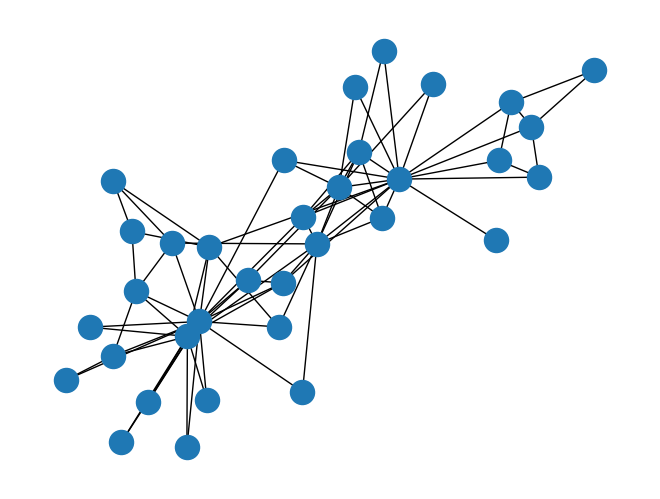

In [2]:
# get Karate Club graph
G = nx.karate_club_graph()
print(G)
nx.draw(G)

In [3]:
# get adjacency matrix
A = nx.to_numpy_array(G)

In [4]:
# run multiscale severability
sev_results = severability.multiscale_severability(A, t_max=10, n_tries=20, n_workers=5)

Optimise severability ...


100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


Compute 1-Rand(t) ...


100%|██████████| 10/10 [00:00<00:00, 452.94it/s]

Compute 1-Rand(t,t') ...


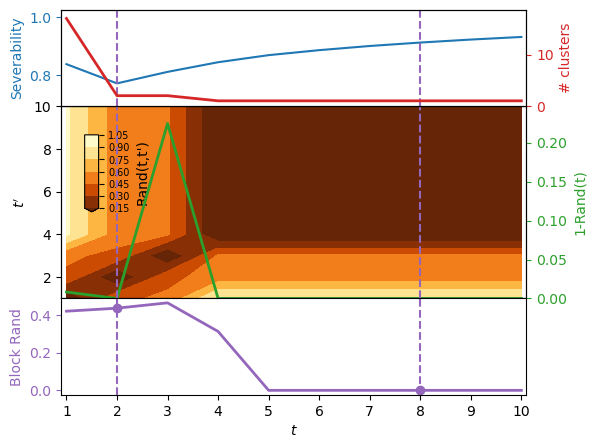

In [5]:
# plot severability results
severability.plot_scan(sev_results)

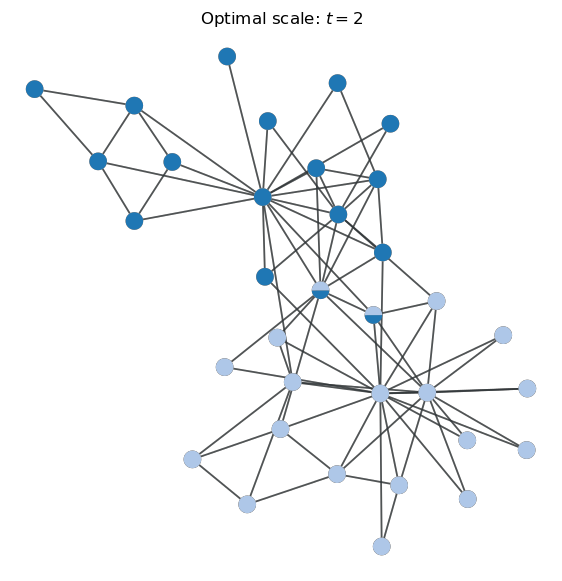

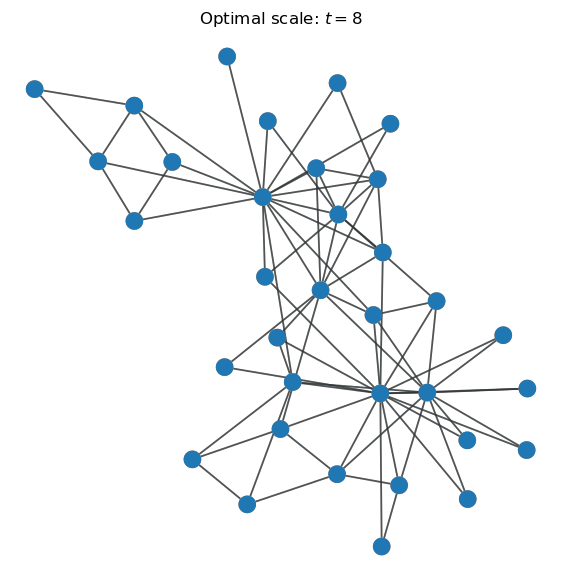

In [6]:
# create the pie chart graph visualisation
for i in sev_results["selected_partitions"]:
    severability.plot_pie_graph(sev_results['partitions'][i], A, title=f"Optimal scale: $t={sev_results['scales'][i]}$")
